In [14]:
import torch
import torchaudio
import glob
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import librosa




In [15]:
AUDIO_DIR = "/Users/zainhazzouri/projects/Bachelor_Thesis/Data1/Kaggle/"
SAMPLE_RATE = 22050 # sample rate of the audio file
bit_depth = 16 # bit depth of the audio file
hop_length = 512
n_mfcc = 20 # number of MFCCs features
n_fft=1024, # window size
n_mels = 256 # number of mel bands to generate
win_length = None # window length



In [16]:
    if torch.cuda.is_available():
        device = "cuda"
    elif torch.backends.mps.is_built(): # if you have apple silicon mac
        device = "mps" ## if it doesn't work try device = torch.device('mps')`
    else:
        device = "cpu"
    print(f"Using {device}")

Using mps


In [17]:
music_waves = glob.glob(AUDIO_DIR+"music_wav"+"/*.wav") # path to audio folder
speech_waves = glob.glob(AUDIO_DIR+"speech_wav"+"/*.wav") # path to audio folder


labels_index = {'music': 0, 'speech': 1}
num_labels = 2


#print the number of the files
print(len(music_waves))
print (len(speech_waves))

64
64


In [18]:
ipd.Audio(music_waves[0])

In [19]:
ipd.Audio(speech_waves[0])


In [20]:
def MFCC_Converter(filepath):
    waveform, sample_rate = torchaudio.load(filepath)
    mfcc = torchaudio.transforms.MFCC(sample_rate=sample_rate,
                                      n_mfcc=n_mfcc,
                                      )(waveform).to(device)
    return mfcc


In [21]:
music_waves_list = []
speech_waves_list = []


def get_mfccs_values(audio_files_path):
    mfccs_values = []
    for file_path in audio_files_path:
        # print(file_path)
        mfccs_value = MFCC_Converter(file_path)
        # plot_spectrogram(mfccs_value[0].T.cpu(), title=file_path)
        mfccs_values.append(mfccs_value)

    return mfccs_values


In [22]:
def plot_spectrogram(spec, title=None, ylabel='freq_bin', aspect='auto', xmax=None):
  fig, axs = plt.subplots(1, 1)
  axs.set_title(title or 'Spectrogram (db)')
  axs.set_ylabel(ylabel)
  axs.set_xlabel('frame')
  im = axs.imshow(librosa.power_to_db(spec), origin='lower', aspect=aspect)
  if xmax:
    axs.set_xlim((0, xmax))
  fig.colorbar(im, ax=axs)
  plt.show(block=False)

In [10]:
#Draft

def plot_mfcc(mfcc):
    plt.figure(figsize=(10, 5))
    plt.imshow(mfcc.numpy(), cmap='viridis', origin='lower', aspect='auto')
    plt.xlabel("Time")
    plt.ylabel("MFCC Coefficients")
    plt.colorbar()
    plt.tight_layout()
    plt.show()

/Users/zainhazzouri/miniforge3/envs/Bachelor_Thesis/lib/python3.8/site-packages/torchaudio/functional/functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(
<ipython-input-23-fe2e65d94d10>:3: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1675584526267/work/aten/src/ATen/native/TensorShape.cpp:3575.)
  plot_spectrogram(music_waves_list[0][1].T.cpu())


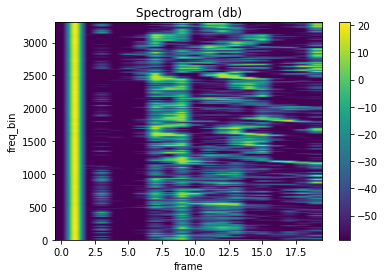

In [23]:
music_waves_list.append(get_mfccs_values(music_waves))
# print(music_waves_list)
plot_spectrogram(music_waves_list[0][1].T.cpu())



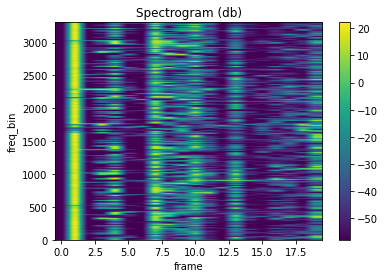

In [24]:
speech_waves_list.append(get_mfccs_values(speech_waves))
# print(speech_waves_list)
plot_spectrogram(speech_waves_list[0][1].T.cpu())

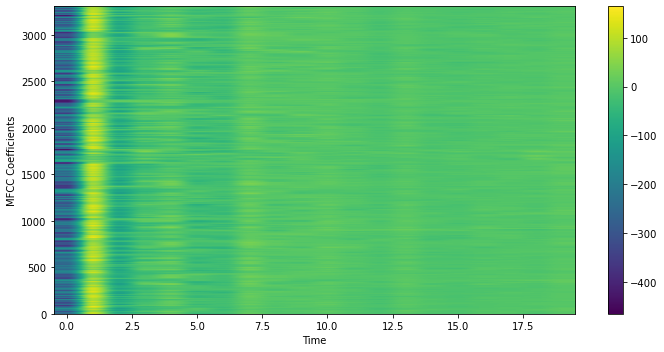

In [27]:
plot_mfcc(speech_waves_list[0][1].T.cpu())



/Users/zainhazzouri/miniforge3/envs/Bachelor_Thesis/lib/python3.8/site-packages/torchaudio/functional/functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


Music sample:


Speech sample:


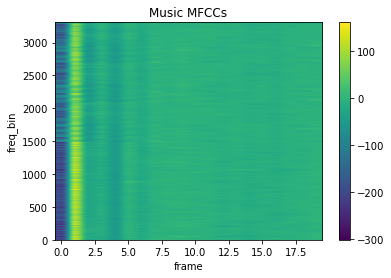

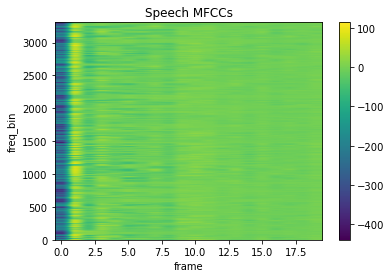

In [1]:
import torch
import torchaudio
import glob
import matplotlib.pyplot as plt
import IPython.display as ipd
import random



class AudioProcessor:
    def __init__(self, audio_dir, n_mfcc=20):
        """Initialize the AudioProcessor class with the audio directory and number of MFCCs."""
        self.audio_dir = audio_dir
        self.n_mfcc = n_mfcc
        self.device = self.get_device()
        self.music_waves = glob.glob(self.audio_dir + "music_wav" + "/*.wav")
        self.speech_waves = glob.glob(self.audio_dir + "speech_wav" + "/*.wav")

    def get_device(self):
        """Determine the appropriate device to use for computation."""
        if torch.cuda.is_available():
            return "cuda"
        elif torch.backends.mps.is_built():
            return "mps"
        else:
            return "cpu"

    def MFCC_Converter(self, filepath):
        """Convert an audio file into MFCC features."""
        waveform, sample_rate = torchaudio.load(filepath)
        mfcc = torchaudio.transforms.MFCC(sample_rate=sample_rate, n_mfcc=self.n_mfcc)(waveform).to(self.device)
        return mfcc

    def plot_spectrogram(self, spec, title=None, ylabel='freq_bin', aspect='auto', xmax=None):
        """Plot the spectrogram of MFCC features."""
        fig, axs = plt.subplots(1, 1)
        axs.set_title(title or 'Spectrogram (db)')
        axs.set_ylabel(ylabel)
        axs.set_xlabel('frame')
        im = axs.imshow(spec, origin='lower', aspect=aspect)
        if xmax:
            axs.set_xlim((0, xmax))
        fig.colorbar(im, ax=axs)
        plt.show(block=False)

    def get_mfccs_values(self, audio_files_path):
        """Get MFCC features for a list of audio files."""
        mfccs_values = []
        for file_path in audio_files_path:
            mfccs_value = self.MFCC_Converter(file_path)
            mfccs_values.append(mfccs_value)
        return mfccs_values

    def play_audio_samples(self):
        """Play random sample audio files."""
        music_sample = random.choice(self.music_waves)
        speech_sample = random.choice(self.speech_waves)

        print("Music sample:")
        ipd.display(ipd.Audio(music_sample))

        print("Speech sample:")
        ipd.display(ipd.Audio(speech_sample))

    def plot_audio_spectrograms(self, music_mfccs_values, speech_mfccs_values):
        """Plot spectrograms for sample music and speech audio files."""
        self.plot_spectrogram(music_mfccs_values[0].squeeze().cpu().numpy().T, title="Music MFCCs")
        self.plot_spectrogram(speech_mfccs_values[0].squeeze().cpu().numpy().T, title="Speech MFCCs")

    def process_audio_files(self):
        """Process audio files and visualize their spectrograms."""
        music_mfccs_values = self.get_mfccs_values(self.music_waves)
        speech_mfccs_values = self.get_mfccs_values(self.speech_waves)
        self.play_audio_samples()
        self.plot_audio_spectrograms(music_mfccs_values, speech_mfccs_values)


if __name__ == '__main__':
    AUDIO_DIR = "/Users/zainhazzouri/projects/Bachelor_Thesis/Data1/Kaggle/"
    n_mfcc = 20

    audio_processor = AudioProcessor(AUDIO_DIR, n_mfcc)
    audio_processor.process_audio_files()
